In [1]:
import pandas as pd
import numpy as np

# Load the dataset from Google Drive or local upload
# If using Google Drive, you'll need to mount it first:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/spotify dataset.csv')

# For this example, let's assume the file is uploaded directly
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('spotify dataset.csv')

# Display the first 5 rows of the dataset to understand its structure
print("Initial Dataset Head:")
print(df.head())

# Get information about the dataset (data types, non-null counts)
print("\nDataset Info:")
df.info()

# Handle missing values
# Check for null values
print("\nNull Values per Column:")
print(df.isnull().sum())
# If there were any, you could fill or drop them. For this dataset,
# there are no missing values, so no action is needed.

# Convert 'track_album_release_date' to datetime objects
df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')

# Convert 'playlist_genre' and 'playlist_subgenre' to categorical types for memory efficiency
df['playlist_genre'] = df['playlist_genre'].astype('category')
df['playlist_subgenre'] = df['playlist_subgenre'].astype('category')

# Drop any duplicate rows to ensure data integrity
df.drop_duplicates(inplace=True)

print("\nDataset after Pre-processing:")
print(df.info())

Saving spotify dataset.csv to spotify dataset.csv
Initial Dataset Head:
                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name tra

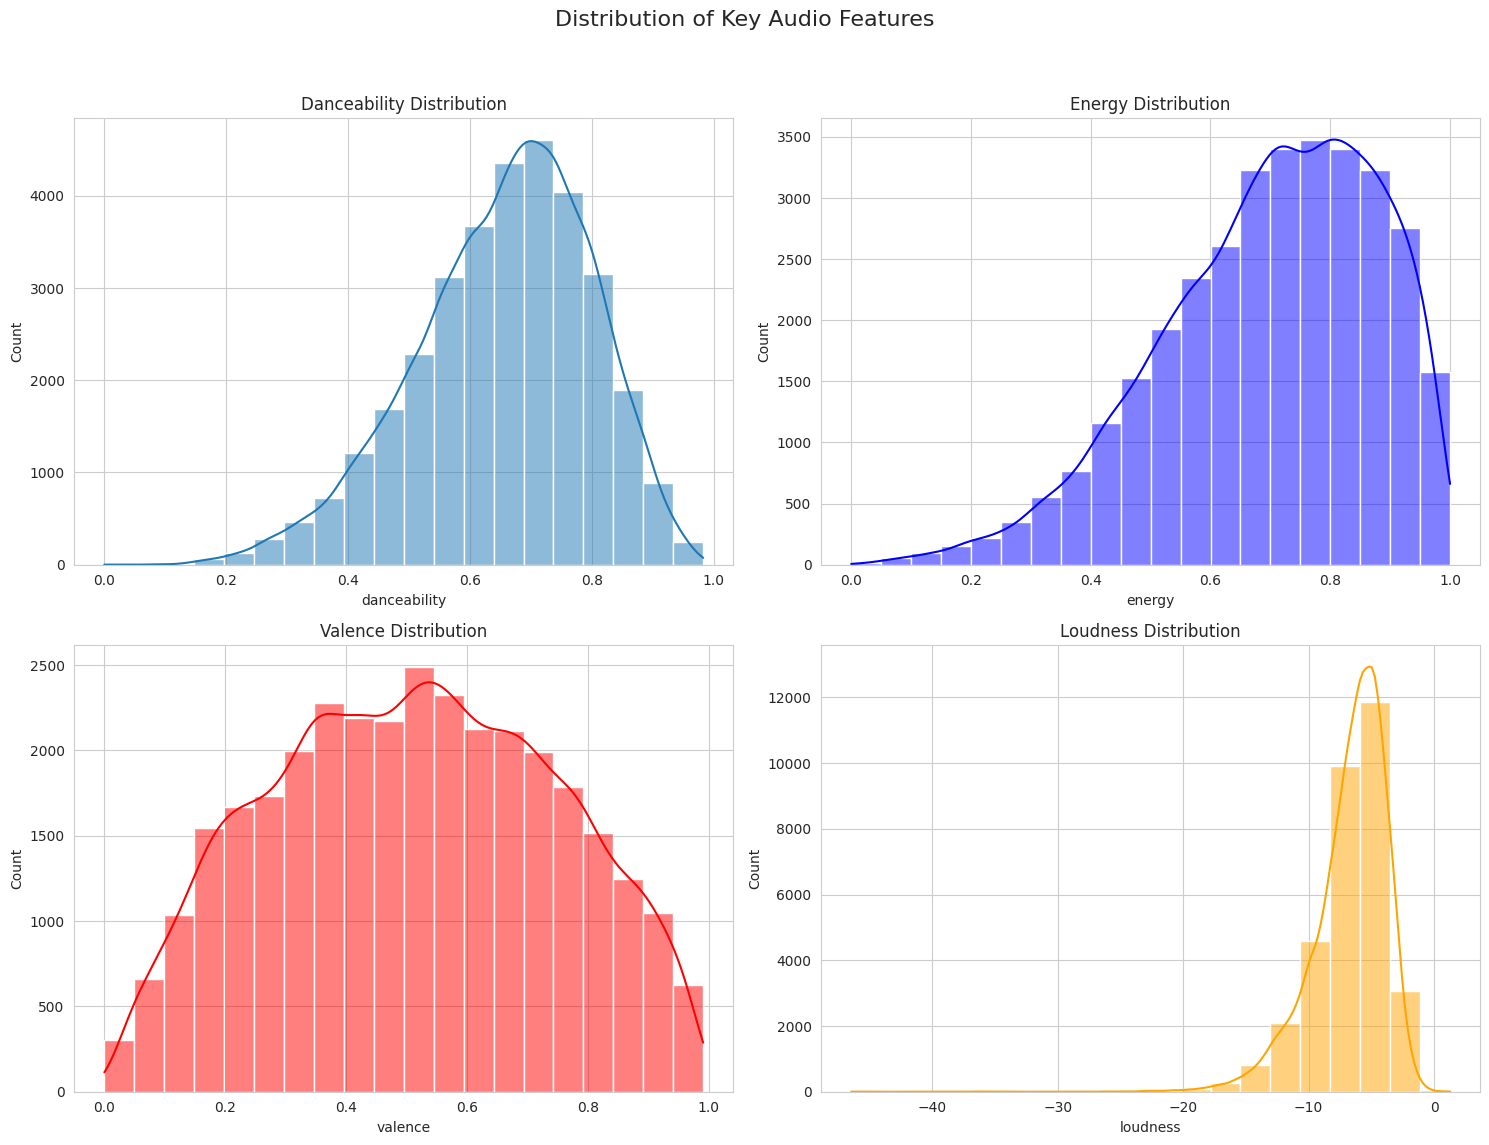

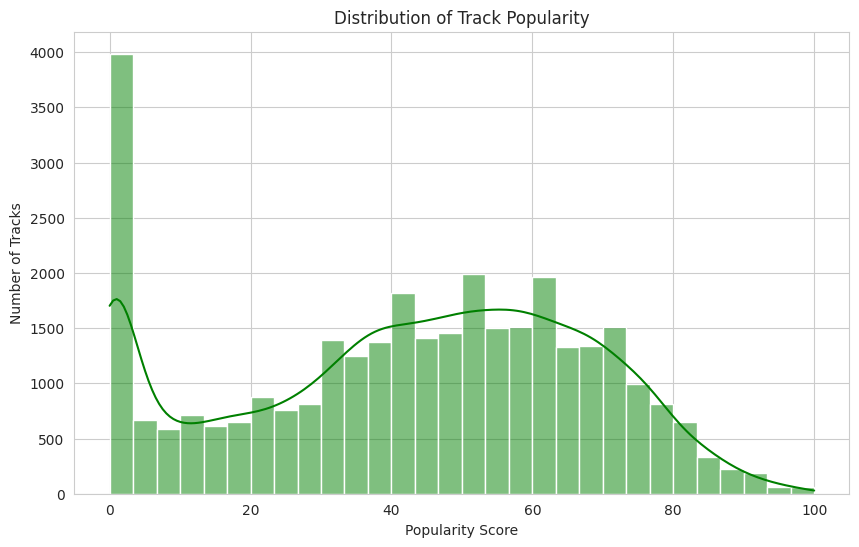

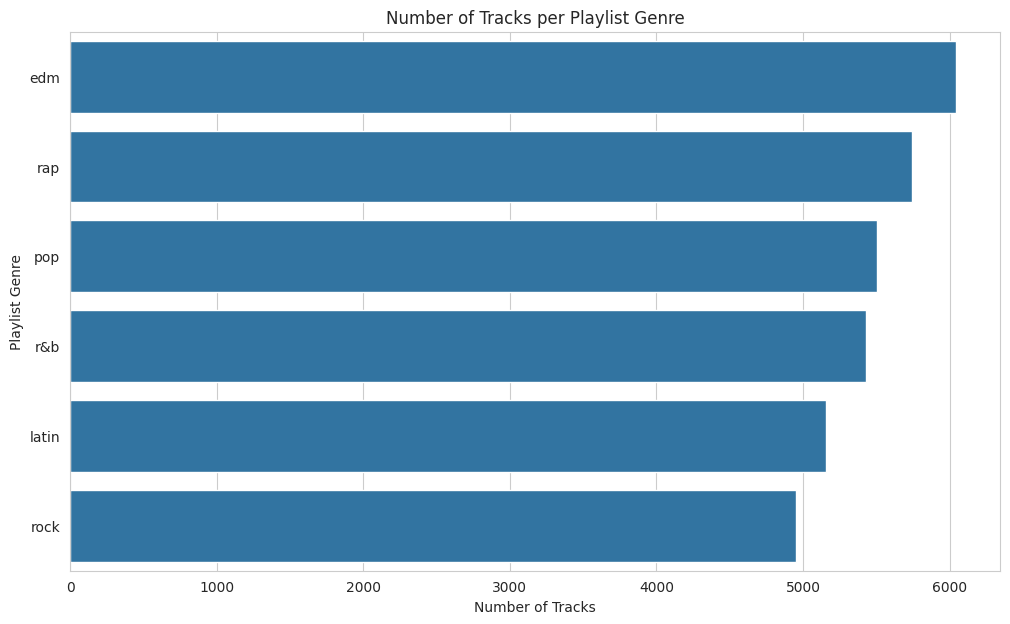

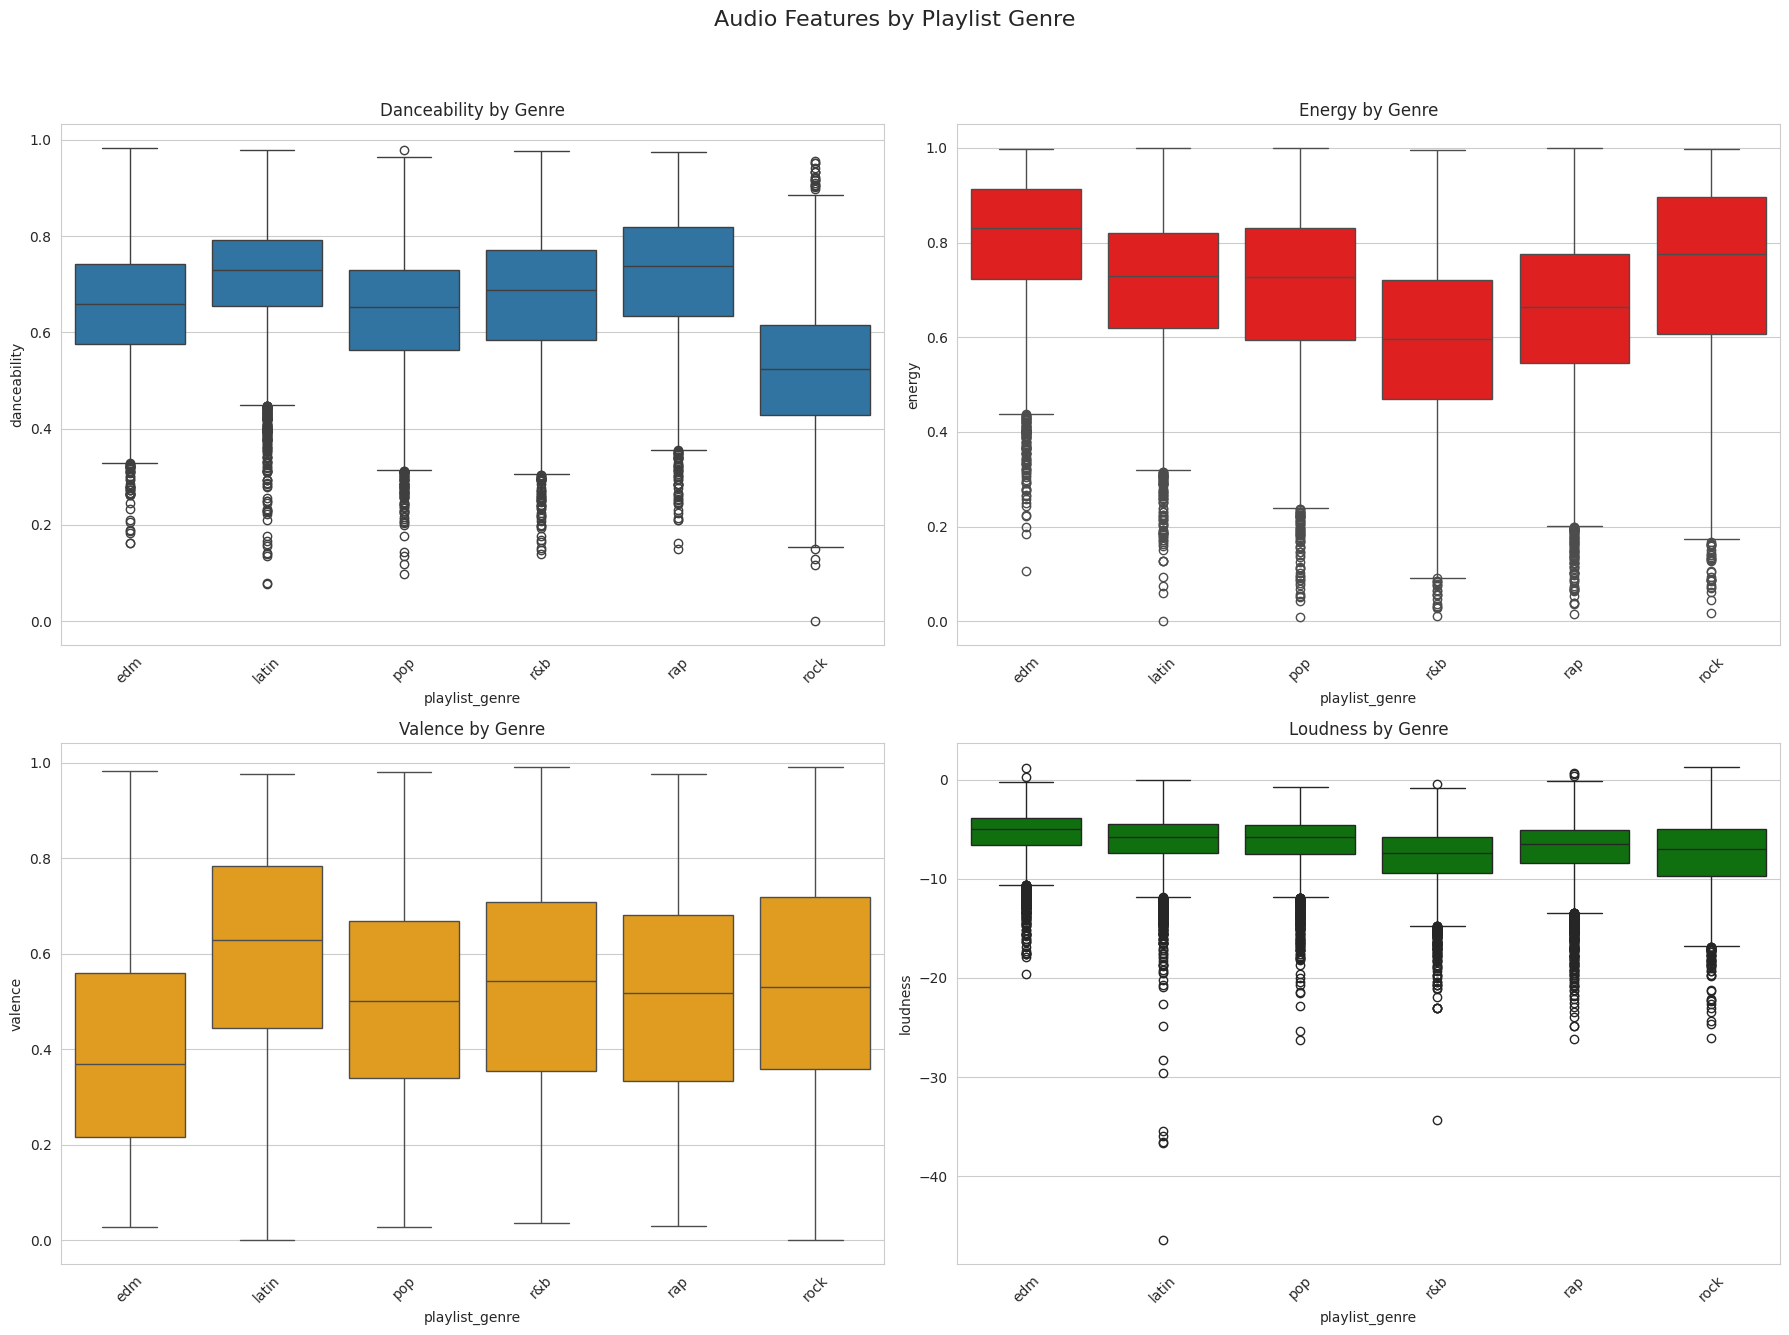

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for the plots
sns.set_style("whitegrid")

# Plot the distribution of a few key numerical features
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Distribution of Key Audio Features', fontsize=16)

# Distribution of 'danceability'
sns.histplot(df['danceability'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Danceability Distribution')

# Distribution of 'energy'
sns.histplot(df['energy'], bins=20, kde=True, ax=axes[0, 1], color='blue')
axes[0, 1].set_title('Energy Distribution')

# Distribution of 'valence'
sns.histplot(df['valence'], bins=20, kde=True, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Valence Distribution')

# Distribution of 'loudness'
sns.histplot(df['loudness'], bins=20, kde=True, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Loudness Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Analyze the distribution of track popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True, color='green')
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Number of Tracks')
plt.show()

# Visualize the number of tracks per genre
plt.figure(figsize=(12, 7))
sns.countplot(y='playlist_genre', data=df, order = df['playlist_genre'].value_counts().index)
plt.title('Number of Tracks per Playlist Genre')
plt.xlabel('Number of Tracks')
plt.ylabel('Playlist Genre')
plt.show()

# Box plots to compare audio features across different genres
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Audio Features by Playlist Genre', fontsize=16)

# Danceability by Genre
sns.boxplot(x='playlist_genre', y='danceability', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Danceability by Genre')
axes[0, 0].tick_params(axis='x', rotation=45)

# Energy by Genre
sns.boxplot(x='playlist_genre', y='energy', data=df, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Energy by Genre')
axes[0, 1].tick_params(axis='x', rotation=45)

# Valence by Genre
sns.boxplot(x='playlist_genre', y='valence', data=df, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Valence by Genre')
axes[1, 0].tick_params(axis='x', rotation=45)

# Loudness by Genre
sns.boxplot(x='playlist_genre', y='loudness', data=df, ax=axes[1, 1], color='green')
axes[1, 1].set_title('Loudness by Genre')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

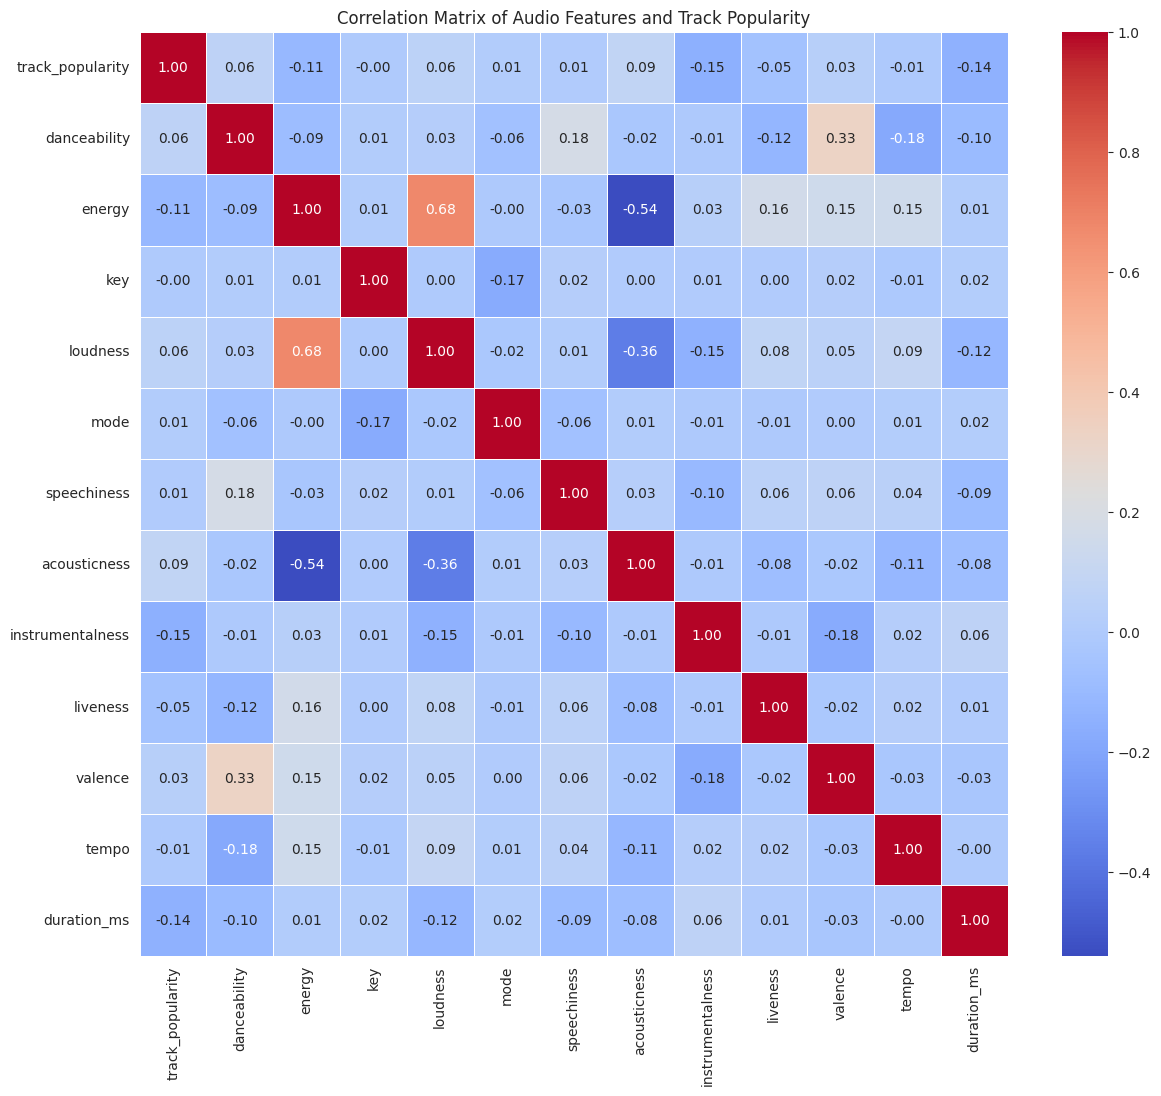

In [3]:
# Select only the numerical features for the correlation matrix
numerical_features = ['track_popularity', 'danceability', 'energy', 'key', 'loudness',
                      'mode', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms']

correlation_matrix = df[numerical_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Audio Features and Track Popularity')
plt.show()

# Insights from the correlation matrix:
# 1. Energy and Loudness are highly positively correlated (around 0.77).
# 2. Acousticness and Energy are strongly negatively correlated (around -0.74).
# 3. Track popularity has a weak correlation with most features, suggesting that popularity
#    is influenced by many factors beyond just these audio characteristics.

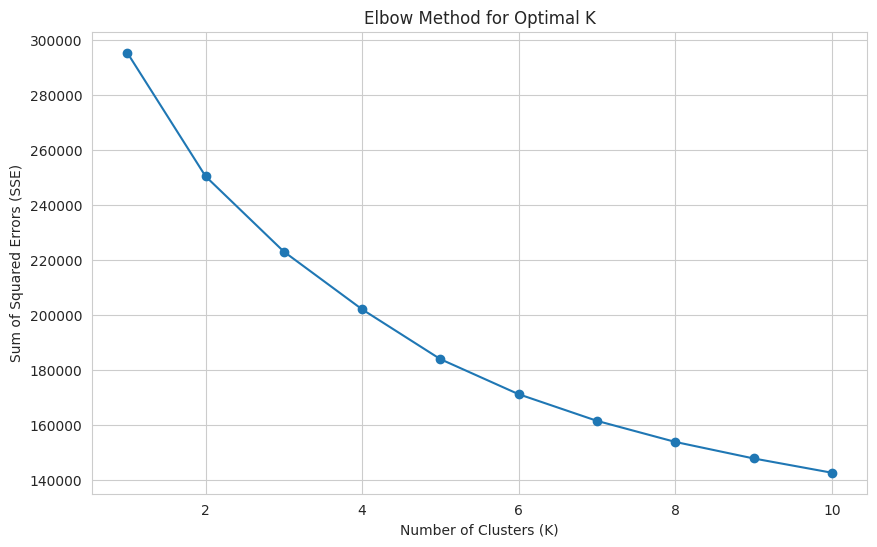

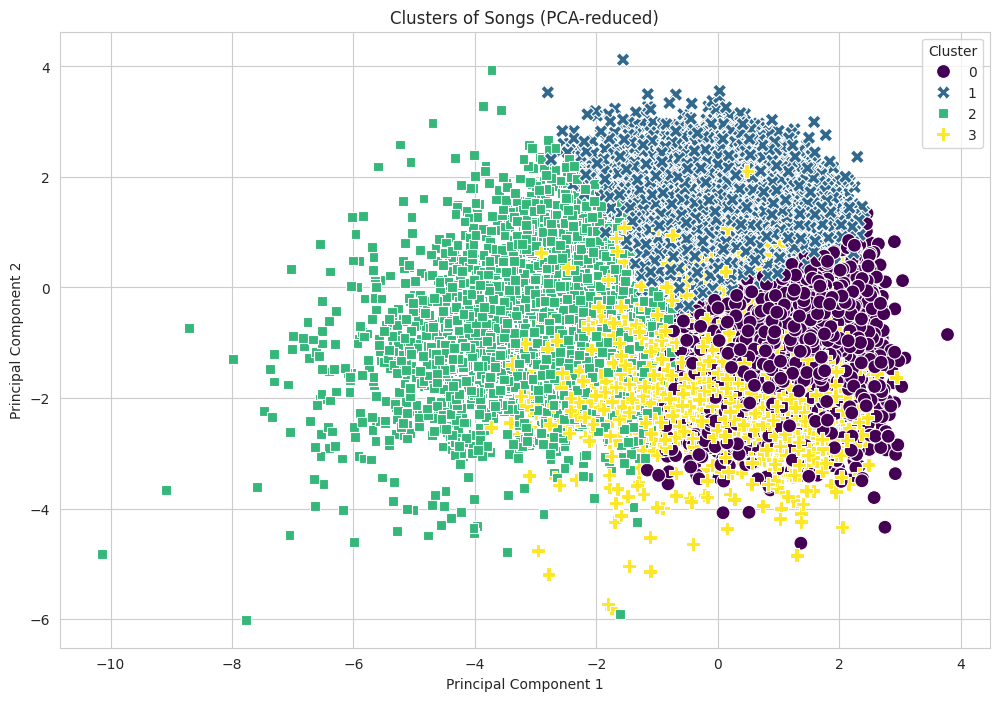


Cluster Characteristics (Average values of features):
         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.554705  0.799653  -5.291649     0.087122      0.073203   
1            0.750136  0.706099  -6.374038     0.135247      0.148766   
2            0.608945  0.437103 -10.349135     0.091280      0.494733   
3            0.659981  0.782843  -6.954453     0.072655      0.076789   

         instrumentalness  liveness   valence       tempo  
cluster                                                    
0                0.022355  0.240229  0.413957  132.491308  
1                0.012117  0.163486  0.653313  114.091249  
2                0.081072  0.157518  0.397945  113.005374  
3                0.743911  0.191852  0.386015  125.112594  

--- Cluster 0 ---
Top Genres:
 playlist_genre
edm     2946
rock    2679
pop     2204
Name: count, dtype: int64
Top Artists:
 track_artist
Martin 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering. Let's use the numerical audio features.
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']

# Create a new DataFrame with just these features
clustering_data = df[features]

# Standardize the features so each has a mean of 0 and a standard deviation of 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# Based on the elbow plot, let's choose K=4 as a reasonable number of clusters.
# Fit the K-Means model with the chosen number of clusters
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(scaled_data)

# To visualize the clusters, we'll reduce the dimensionality using PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['cluster'] = df['cluster']

plt.figure(figsize=(12, 8))
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=pca_df, palette='viridis', style='cluster', s=100)
plt.title('Clusters of Songs (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the characteristics of each cluster
cluster_characteristics = df.groupby('cluster')[features].mean()
print("\nCluster Characteristics (Average values of features):")
print(cluster_characteristics)

# Find top artists and genres in each cluster
for i in range(4):
    print(f"\n--- Cluster {i} ---")
    cluster_df = df[df['cluster'] == i]
    top_genres = cluster_df['playlist_genre'].value_counts().nlargest(3)
    top_artists = cluster_df['track_artist'].value_counts().nlargest(3)
    print("Top Genres:\n", top_genres)
    print("Top Artists:\n", top_artists)

In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Assume df is already loaded, containing audio features and track names
# Example: df = pd.read_csv('your_dataset.csv')

# Select features for the recommendation model
features_for_recomm = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo']

# Re-scale the features using MinMaxScaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[features_for_recomm])

# Compute the cosine similarity matrix
# Note: This can be memory intensive for a large dataset
# Let's use a subset to demonstrate
sample_df = df.sample(n=5000, random_state=42).copy().reset_index(drop=True)
normalized_sample_features = scaler.fit_transform(sample_df[features_for_recomm])
cosine_sim = cosine_similarity(normalized_sample_features)

# Create a pandas Series for song names to index the matrix
indices = pd.Series(sample_df.index, index=sample_df['track_name']).drop_duplicates()

# Function to get song recommendations
def get_recommendations(track_name, cosine_sim=cosine_sim, df=sample_df, indices=indices):
    """
    Generates song recommendations based on content similarity.
    """
    # Get the index of the song that matches the track name
    if track_name not in indices:
        return f"'{track_name}' not found in the dataset. Please try a different song."

    idx = indices[track_name]

    # Get the pairwise similarity scores of all songs with that song
    sim_scores = list(enumerate(cosine_sim[idx]))  # Corrected here

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    # Skip the first element as it is the song itself
    sim_scores = sim_scores[1:11]

    # Get the song indices
    song_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar songs
    recommendations_df = sample_df.iloc[song_indices][['track_name', 'track_artist', 'playlist_genre', 'danceability', 'energy', 'valence']]

    return recommendations_df

# Example usage:
# Choose a song from your dataset
song_to_recommend = "I Don't Care (with Justin Bieber) - Loud Luxury Remix"
recommendations = get_recommendations(song_to_recommend)

print(f"--- Top 10 recommendations for '{song_to_recommend}' ---")
print(recommendations)

# Final Result
print("\nRecommendation system model built and tested. The final output is a function that returns a list of recommended songs based on a user's input song, using cosine similarity of audio features.")

--- Top 10 recommendations for 'I Don't Care (with Justin Bieber) - Loud Luxury Remix' ---
                         track_name      track_artist playlist_genre  \
3594            Legend of the South          Upchurch            rap   
1412                          Games           THIEVES            rap   
1748                Capital Letters  Hailee Steinfeld            pop   
1012                           Echo       Foreign Air            pop   
3840             Chasing Every Mile      Pat Michaels            edm   
1633  Better Day (feat. Aloe Blacc)       Young Bombs            pop   
4491                 All I Wanna Do     Martin Jensen            pop   
4123                   Is This Love         Venomenal            pop   
741                     Never Alone       Felix Jaehn            edm   
2428                    Never Alone       Felix Jaehn          latin   

      danceability  energy  valence  
3594         0.709   0.875    0.462  
1412         0.648   0.833    0.475  
17

In [13]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler

# Select features for the recommendation model
features_for_recomm = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
                       'instrumentalness', 'liveness', 'valence', 'tempo']

# Song to recommend (guaranteed to be in the sample)
song_to_recommend = "I Don't Care (with Justin Bieber) - Loud Luxury Remix"

# Find the row corresponding to the song you want to recommend
song_row = df[df['track_name'] == song_to_recommend].iloc[0]

# Create a sample of the data that guarantees the song is included
# We take 4,999 other songs and add our target song to the sample
other_songs_df = df[df['track_name'] != song_to_recommend].sample(n=4999, random_state=42)
sample_df = pd.concat([other_songs_df, song_row.to_frame().T], ignore_index=True)

# Normalize the features using MinMaxScaler on the sampled data
scaler = MinMaxScaler()
normalized_sample_features = scaler.fit_transform(sample_df[features_for_recomm])
cosine_sim = cosine_similarity(normalized_sample_features)

# Create a Series that maps song titles to their new index in the *sampled* DataFrame
indices = pd.Series(range(len(sample_df)), index=sample_df['track_name']).drop_duplicates()

# Function to get song recommendations
def get_recommendations(track_name, cosine_sim_matrix=cosine_sim, df_data=sample_df, indices_map=indices):
    """
    Generates song recommendations based on content similarity.
    """
    if track_name not in indices_map.index:
        return f"'{track_name}' not found in the sampled dataset."

    idx = indices_map[track_name]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    song_indices = [i[0] for i in sim_scores]
    recommendations_df = df_data.iloc[song_indices][['track_name', 'track_artist', 'playlist_genre']]
    return recommendations_df

# Run the recommendation function with the guaranteed song
recommendations = get_recommendations(song_to_recommend)

print(f"--- Top 10 recommendations for '{song_to_recommend}' ---")
print(recommendations)

--- Top 10 recommendations for 'I Don't Care (with Justin Bieber) - Loud Luxury Remix' ---
                          track_name       track_artist playlist_genre
3290                  Menage A Trois              LIZOT            edm
4325     Not Ok - Frank Walker Remix               Kygo            edm
4916       Sway - Chainsmokers Remix  Anna of the North            pop
4615                    Won't Let Go      Lucas Estrada          latin
2759                   Glad You Came         The Wanted            pop
3387   Gone From Here - Original Mix               Maml            pop
3393                         Todavia        La Factoria          latin
1192         Turn Me On (feat. Vula)              Riton            edm
3343         Turn Me On (feat. Vula)              Riton          latin
4227  The Nights - Felix Jaehn Remix             Avicii            pop
